In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt 

from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
# set up the url address
url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold reponse info
City        = []
Cloudiness  = []
Country     = []
Date        = []
Humidity    = []
Lat         = []
Lng         = []
Max_Temp    = []
Wind_Speed  = []

# for each of the city from the list genereated
for city in cities:
    print("Extracting data for " + city)
    
    # handle key errors.  Weather API may not have information on some of 
    # random cities genereated above. 
    try:
        # get the weather data using the city as key 
        # temperature unit in Fahrenheit
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url)
        data = weather_response.json()

        # extract from data received and populate the lists
        City.append(data['name'])
        Cloudiness.append(data['clouds']['all'])
        Country.append(data['sys']['country'])
        Date.append(data['dt'])
        Humidity.append(data['main']['humidity'])
        Lat.append(data['coord']['lat'])
        Lng.append(data['coord']['lon'])
        Max_Temp.append(data['main']['temp_max'])
        Wind_Speed.append(data['wind']['speed'])
    
    except KeyError:
        print("No information on " + city)


Extracting data for busselton
Extracting data for tomohon
Extracting data for vaini
Extracting data for sao filipe
Extracting data for saint george
Extracting data for belaya gora
Extracting data for agnibilekrou
Extracting data for olinda
Extracting data for mataura
Extracting data for binghamton
Extracting data for monteagudo
Extracting data for cap malheureux
Extracting data for pitimbu
Extracting data for ushuaia
Extracting data for cape town
Extracting data for melo
Extracting data for bredasdorp
Extracting data for rikitea
Extracting data for hilo
Extracting data for makakilo city
Extracting data for illoqqortoormiut
No information on illoqqortoormiut
Extracting data for koungou
No information on koungou
Extracting data for choma
Extracting data for haines junction
Extracting data for salalah
Extracting data for the valley
Extracting data for domingos martins
Extracting data for magistralnyy
Extracting data for punta arenas
Extracting data for cabo san lucas
Extracting data for m

Extracting data for ixtapa
Extracting data for caceres
Extracting data for bay city
Extracting data for chokurdakh
Extracting data for banda aceh
Extracting data for tamiahua
Extracting data for payo
Extracting data for mahebourg
Extracting data for tuktoyaktuk
Extracting data for hambantota
Extracting data for northam
Extracting data for hithadhoo
Extracting data for saint-joseph
Extracting data for saint-leu
Extracting data for palampur
Extracting data for maragogi
Extracting data for yulara
Extracting data for catumbela
Extracting data for haikou
Extracting data for nuuk
Extracting data for camacha
Extracting data for norman wells
Extracting data for severo-kurilsk
Extracting data for mareeba
Extracting data for bathsheba
Extracting data for carnarvon
Extracting data for ponta do sol
Extracting data for port hardy
Extracting data for susehri
Extracting data for elliot
Extracting data for oksfjord
Extracting data for villaviciosa
Extracting data for deloraine
Extracting data for rich

Extracting data for mwense
Extracting data for flinders
Extracting data for hauterive
Extracting data for maceio
Extracting data for dubbo
Extracting data for obihiro
Extracting data for kyshtovka
Extracting data for clyde
Extracting data for liberty
Extracting data for karacabey
Extracting data for dunedin
Extracting data for kapuskasing
Extracting data for nagua
Extracting data for kirakira
Extracting data for lyaskelya
Extracting data for aparecida
Extracting data for college
Extracting data for kruisfontein
Extracting data for kitama
Extracting data for xinqing
Extracting data for kazalinsk
No information on kazalinsk
Extracting data for huilong
Extracting data for omsukchan
Extracting data for paradwip
No information on paradwip
Extracting data for sioux lookout
Extracting data for goulburn
Extracting data for north bend
Extracting data for vilhena
Extracting data for porto novo
Extracting data for jumla
Extracting data for crotone
Extracting data for gamba
Extracting data for mir

In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    'city': City,
    'cloudiness': Cloudiness,
    'country': Country,
    'date': Date,
    'humidity': Humidity,
    'lat': Lat,
    'lng': Lng,
    'max_temp': Max_Temp,
    'wind_speed': Wind_Speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

print("We have weather information on " + str(weather_df.shape[0]) + " cities")
weather_df.head(10)

We have weather information on 547 cities


,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Busselton,0,AU,1536945162,100,-33.64,115.35,48.44,10.65
1,Tomohon,20,ID,1536942600,83,1.33,124.84,71.60,2.24
2,Vaini,76,IN,1536945163,95,15.34,74.49,71.21,3.60
3,Sao Filipe,20,CV,1536945072,87,14.90,-24.50,81.20,9.19
4,Saint George,0,GR,1536942000,50,39.45,22.34,78.80,9.17
5,Belaya Gora,92,RU,1536945164,99,68.54,146.19,36.83,4.83
6,Agnibilekrou,80,CI,1536945164,90,7.13,-3.20,75.26,7.96
7,Olinda,90,EC,1536940800,65,-2.03,-79.75,78.80,4.70
8,Mataura,0,NZ,1536945165,64,-46.19,168.86,50.06,14.00
9,Binghamton,75,US,1536944160,73,42.10,-75.91,77.00,9.17


In [5]:
# Save the data in csv file
# Note to avoid any issues later, use encoding="utf-8"
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

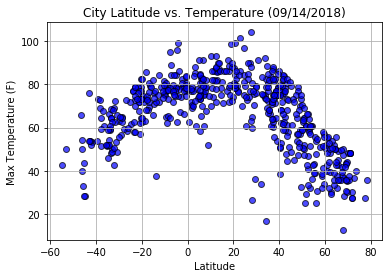

In [6]:
#  --------------  Latitude vs. Temperature Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Max Temperature (F)

plt.scatter(weather_df['lat'], weather_df['max_temp'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Temperature (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Temperature.png")
plt.show()

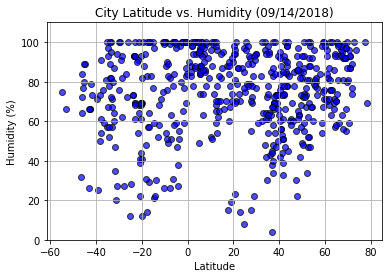

In [7]:
#  --------------  Latitude vs. Humidity Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Humidity (%)

plt.scatter(weather_df['lat'], weather_df['humidity'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Humidity (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 110)
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Humidity.png")
plt.show()

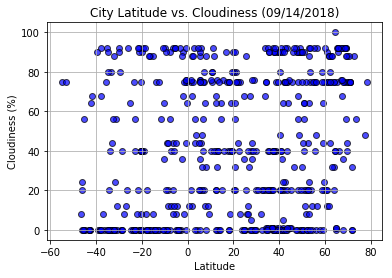

In [8]:
#  --------------  Latitude vs. Cloudiness Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Cloudiness (%)

plt.scatter(weather_df['lat'], weather_df['cloudiness'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Cloudiness (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Cloudiness.png")
plt.show()

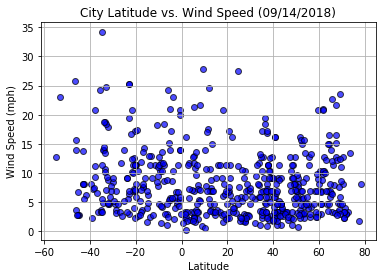

In [9]:
#  --------------  Latitude vs. Wind Speed Plot  --------------------

# x_axis ==> Latitude
# y_axis ==> Wind Speed (%)

plt.scatter(weather_df['lat'], weather_df['wind_speed'], edgecolors="black",
            marker="o", alpha=0.7, facecolors="blue")

# cosmatic stuff
todays_date = dt.datetime.today().strftime("%m/%d/%Y")
plt.title("City Latitude vs. Wind Speed (" + todays_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("City_Latitude_vs_Wind_Speed.png")
plt.show()

In [10]:
# Convert to script
get_ipython().system('jupyter nbconvert --to script WeatherPy.ipynb')

[NbConvertApp] Converting notebook WeatherPy.ipynb to script
[NbConvertApp] Writing 6175 bytes to WeatherPy.py
